# ARMENIAN KINDERGARTEN MULTI-CITY ANALYSIS
## Multi-City Data Scraping, Cleaning, and Comprehensive Statistical Analysis aross 10 Cities

#### Student: Iren Stepanyan, Lusine Stepanyan
#### Course: Algorithms and Programming Language (APL)
#### Professor: V. Avetisyan  
##### Date: Novermber 2025


## Dataset Overview

This dataset contains comprehensive information about kindergartens across 10 Armenian cities, collected through web scraping from official municipal government portals. The dataset enables analysis of regional disparities in early childhood education infrastructure, demand patterns, and capacity utilization across urban and rural municipalities in Armenia.

## Problem Context
Armenia faces significant challenges in early childhood education accessibility, with varying levels of kindergarten availability across different regions. This dataset aims to quantify:
* **Demand-supply gaps:** Identifying cities with the highest unmet demand (waiting lists)
* **Capacity utilization:** Understanding overcrowding and underutilization patterns
* **Regional inequalities:** Comparing capital city (Yerevan) vs. provincial cities
* **Resource allocation:** Informing policy decisions for infrastructure investment

## Project Objective:
* **Regional variations** in kindergarten demand and capacity across 10 cities
* **Urban vs rural** differences in early childhood education accessibility
* **Demand patterns** and their correlation with city population and size
* **Statistical significance** of inter-city differences in key metrics
* **Capacity stress indicators** to identify areas requiring immediate intervention

## Data Sources:
1. Yerevan: https://mankapartez.yerevan.am/order-view
2. Ijevan: https://ijevan.infosys.am/Pages/KinderGarten/List.aspx
3. Gyumri: https://gyumricity.am/Pages/KinderGarten/List.aspx
4. Vanadzor: https://cmis.vanadzor.am/Pages/KinderGarten/List.aspx
5. Armavir: https://armavircity.am/Pages/KinderGarten/List.aspx
6. Kapan: https://kapan.am/pages/KinderGarten/List.aspx
7. Abovyan: https://abovyan.am/Pages/KinderGarten/List.aspx
8. Sevan: https://sevancity.am/Pages/KinderGarten/List.aspx
9. Vaxarshapat: https://docs.ejmiatsin.am/Pages/KinderGarten/List.aspx
10. Artashat: https://artashat.am/Pages/KinderGarten/List.aspx

## Attribute Description
### Core Features(Scraped Data)
1. **city** - Municipality name (Yerevan, Gyumri, Vanadzor, etc.)
2. **name** - Official kindergarten name
3. **district** - District/neighborhood within city (where available)
4. **address** - Physical location of kindergarten
5. **order_count** - Number of children on waiting list (unmet demand)
6. **registered_count** - Number of currently enrolled children
7. **groups_count** - Number of classroom groups/sections
8. **capacity** - Maximum designed capacity of the kindergarten
9. **phone** - Contact phone number
10. **population** - City population (for per capita analysis)
11. **region** - Administrative region of Armenia

### Engineered Features (Derived)
1. **waiting_list_ratio** - Ratio of waiting list to enrolled children
2. **total_demand** - Sum of enrolled + waiting list children
3. **demand_rate** - Proportion of total demand that is unmet
4. **occupancy_rate** - Percentage of capacity currently filled
5. **children_per_group** - Average class size
6. **capacity_per_group** - Designed capacity per group
7. **demand_per_group** - Demand pressure per group
8. **kg_per_100k** - Kindergartens per 100,000 population
9. **waiting_per_100k** - Waiting list size per 100,000 population
10. **capacity_per_100k** - Total capacity per 100,000 population
11. **is_overcrowded** - Binary indicator (>25 children per group)
12. **has_waiting_list** - Binary indicator (waiting list exists)
13. **is_full** - Binary indicator (at or above capacity)
14. **size_category** - Categorical (Small/Medium/Large) based on groups
15. **demand_category** - Categorical (Low/Medium/High) based on waiting ratio
16. **city_size** - Categorical (Major City/Large City/Medium City/Small City/Town)

## Programming Launguage
* `Python 3.13`

## Libraries used: we be changed

**Data Handling and Analysis:**

* `pandas` – for data manipulation and analysis
* `numpy` – for numerical operations
* `sklearn.preprocessing` - StandardScaler, MinMaxScaler, LabelEncoder
* `sklearn.decomposition` - PCA for dimensionality reduction

**Visualization:**

* `matplotlib.pyplot` – for plotting graphs
* `seaborn` – for statistical data visualization

**Statistics / Scientific Computing:**

* `scipy.stats` – statistical tests (`chi2_contingency`, `f_oneway`, `ttest_ind`, `normaltest`, `kruskal`, `levene`, `shapiro`, `mannwhitneyu`)

**Web Scraping / Automation:**

* `selenium` – browser automation (`webdriver`, `By`, `WebDriverWait`, `expected_conditions`)
* `bs4` (BeautifulSoup) – HTML parsing
* `re` – regular expressions
* `time` – for delays/waits during scraping

**Utilities:**

* `warnings` – for cleaner output
* `os` - for file system operations

**Visualization Style Settings:**

* `plt.style.use('seaborn-v0_8-darkgrid')`
* `sns.set_palette("husl")`

## Other tools:
1. **Google colab:** for sharing and storing the code
2. **Google Drive:** for storing csv files ([Drive Link](https://drive.google.com/drive/folders/1KLS5gleumjbxVMaC3T06dMRDxTl0-PQC?usp=sharing) )
3. **Chrome WebDriver:** for web scraping
4. **GitHub:** for version control

#**Do Not Run the Scraping Code**

The Selenium scraping section was executed on a **local machine** and produced the final dataset, which is already uploaded to **Google Drive**.

To save time and avoid site load, please skip the scraping cells.

**!** You may continue (run) starting from Stage 3.

# Stage 0: Environment Setup and Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import (chi2_contingency, f_oneway, ttest_ind, normaltest,
                         kruskal, levene, shapiro, mannwhitneyu)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


# Web scraping
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
import time
import re
from bs4 import BeautifulSoup

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

#print("All libraries imported successfully")

# Stage 1: Data Scraping

In [ ]:
# Define Armenian cities and their kindergarten URLs
ARMENIAN_CITIES = {
    'Yerevan': {
        'url': 'https://mankapartez.yerevan.am/order-view',
        'type': 'angular',  # Dynamic Angular site
        'population': 1093000,
        'region': 'Capital'
    },
    'Ijevan': {
        'url': 'https://ijevancity.am/Pages/KinderGarten/List.aspx',
        'type': 'aspnet',  # ASP.NET site
        'population': 21000,
        'region': 'Tavush'
    },
    'Gyumri': {
        'url': 'https://gyumricity.am/Pages/KinderGarten/List.aspx',
        'type': 'aspnet',
        'population': 121000,
        'region': 'Shirak'
    },
    'Vanadzor': {
        'url': 'https://cmis.vanadzor.am/Pages/KinderGarten/List.aspx',
        'type': 'aspnet',
        'population': 82000,
        'region': 'Lori'
    },
    'Armavir': {
        'url': 'https://armavircity.am/Pages/KinderGarten/List.aspx',
        'type': 'aspnet',
        'population': 29000,
        'region': 'Armavir'
    },
    'Kapan': {
        'url': 'https://kapan.am/pages/KinderGarten/List.aspx',
        'type': 'aspnet',
        'population': 43000,
        'region': 'Syunik'
    },
    'Abovyan': {
        'url': 'https://abovyan.am/Pages/KinderGarten/List.aspx',
        'type': 'aspnet',
        'population': 46000,
        'region': 'Kotayk'
    },
    'Sevan': {
        'url': 'https://sevancity.am/Pages/KinderGarten/List.aspx',
        'type': 'aspnet',
        'population': 19000,
        'region': 'Gegharkunik'
    },
    'Vaxarshapat': {
        'url': 'https://docs.ejmiatsin.am/Pages/KinderGarten/List.aspx',
        'type': 'aspnet',
        'population': 47446,
        'region': 'Armavir'
    },
     'Artashat': {
        'url': 'https://artashat.am/Pages/KinderGarten/List.aspx',
        'type': 'aspnet',
        'population': 29040,
        'region': 'Ararat'
    }
}

def scrape_yerevan_style(driver, url, city_name):
    """Scrape Angular-based site (Yerevan style)"""
    driver.get(url)
    time.sleep(5)

    kindergartens = []
    kinder_elements = driver.find_elements(By.CSS_SELECTOR, '.kinder-content')

    for element in kinder_elements:
        try:
            kg = {'city': city_name}
            kg['name'] = element.find_element(By.CSS_SELECTOR, '.kinder-title a').text.strip()

            list_items = element.find_elements(By.CSS_SELECTOR, '.kinder-body ul li')
            for item in list_items:
                text = item.text.strip()
                if 'Հերթագրված է' in text:
                    match = re.search(r'(\d+)\s*երեխա', text)
                    if match: kg['order_count'] = int(match.group(1))
                elif 'Գործում է' in text and 'խումբ' in text:
                    match = re.search(r'(\d+)\s*խումբ', text)
                    if match: kg['groups_count'] = int(match.group(1))
                elif 'Հաշվառված է' in text:
                    match = re.search(r'(\d+)\s*երեխա', text)
                    if match: kg['registered_count'] = int(match.group(1))
                else:
                    if 'address' not in kg and len(text) > 10:
                        kg['address'] = text
                    elif 'district' not in kg:
                        kg['district'] = text

            if kg.get('name'):
                kindergartens.append(kg)
        except Exception as e:
            continue

    return kindergartens
def scrape_aspnet_style(driver, url, city_name):
    """Scrape ASP.NET-based sites (Ijevan, Gyumri, etc.)"""
    driver.get(url)
    time.sleep(3)

    kindergartens = []

    # Get page source and parse with BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Find all kindergarten items
    items = soup.find_all('a', id=lambda x: x and 'rptGardenList' in str(x) and 'LbCategory' in str(x))

    for item in items:
        try:
            kg = {'city': city_name}

            # Extract name
            name_div = item.find('div', class_='CategoryName')
            if name_div:
                kg['name'] = name_div.get_text(strip=True)

            # Extract from table rows
            rows = item.find_all('tr')
            for row in rows:
                text = row.get_text(strip=True)

                # Extract address (contains map icon)
                if 'glyphicon-map-marker' in str(row):
                    kg['address'] = text.replace('glyphicon', '').strip()

                # Extract phone
                elif 'glyphicon-earphone' in str(row):
                    kg['phone'] = re.search(r'[\d\s\-+()]+', text)
                    if kg['phone']:
                        kg['phone'] = kg['phone'].group(0).strip()

                # Extract groups (Գործում է X խումբ)
                elif 'Գործում է' in text and 'խումբ' in text:
                    match = re.search(r'(\d+)\s*խումբ', text)
                    if match:
                        kg['groups_count'] = int(match.group(1))

                # Extract capacity (Ցուցակային թիվ)
                elif 'Ցուցակային' in text or 'թիվ' in text:
                    match = re.search(r'(\d+)', text)
                    if match:
                        kg['capacity'] = int(match.group(1))

                # Extract registered (Հաշվառված է X երեխա / Հաճախում է)
                elif 'Հաշվառված' in text or 'Հաճախում' in text:
                    match = re.search(r'(\d+)\s*երեխա', text)
                    if match:
                        kg['registered_count'] = int(match.group(1))

                # Extract waiting list (Հերթագրված է X երեխա)
                elif 'Հերթագրված' in text:
                    match = re.search(r'(\d+)\s*երեխա', text)
                    if match:
                        kg['order_count'] = int(match.group(1))

            if kg.get('name'):
                kindergartens.append(kg)

        except Exception as e:
            print(f"Error parsing item: {e}")
            continue

    return kindergartens

def scrape_all_cities():
    """Scrape kindergarten data from all Armenian cities"""
    print("\n" + "="*70)
    print("MULTI-CITY DATA SCRAPING")
    print("="*70)

    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument('--disable-blink-features=AutomationControlled')

    all_data = []

    driver = webdriver.Chrome(options=chrome_options)

    try:
        for city_name, city_info in ARMENIAN_CITIES.items():
            try:
                if city_info['type'] == 'angular':
                    city_data = scrape_yerevan_style(driver, city_info['url'], city_name)
                else:
                    city_data = scrape_aspnet_style(driver, city_info['url'], city_name)

                # Add city metadata
                for kg in city_data:
                    kg['population'] = city_info['population']
                    kg['region'] = city_info['region']

                all_data.extend(city_data)
                time.sleep(2)  # Be polite to servers

            except Exception as e:
                print(f" Error scraping {city_name}: {e}")
                continue

        print(f"Total kindergartens scraped: {len(all_data)}")
        print(f"Cities successfully scraped: {len(set([kg['city'] for kg in all_data]))}")

    finally:
        driver.quit()

    return all_data

# Execute multi-city scraping
all_kindergartens = scrape_all_cities()
df_raw = pd.DataFrame(all_kindergartens)

print(f"\nRaw data shape: {df_raw.shape}")
print(f"Columns: {df_raw.columns.tolist()}")
print(f"\nCities in dataset:")
print(df_raw['city'].value_counts())

# Stage 2: Data Cleaning

In [ ]:
print("\n" + "="*70)
print("DATA CLEANING")
print("="*70)

def clean_multi_city_data(df):
    """Comprehensive cleaning for multi-city dataset"""
    df_clean = df.copy()

    print("\nInitial data shape:", df_clean.shape)
    print("Initial missing values:\n", df_clean.isnull().sum())

    # 1. Clean text columns
    text_cols = ['name', 'address', 'phone']
    for col in text_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].astype(str).str.strip()
            df_clean[col] = df_clean[col].str.replace(r'\s+', ' ', regex=True)

    # 2. Handle numeric columns
    numeric_cols = ['order_count', 'registered_count', 'groups_count', 'capacity']
    for col in numeric_cols:
        if col in df_clean.columns:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').fillna(0).astype(int)

    # 3. Remove duplicates
    before_dup = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=['city', 'name'], keep='first')
    print(f"→ Removed {before_dup - len(df_clean)} duplicate rows")

    # 4. Remove rows with missing critical data
    before_null = len(df_clean)
    df_clean = df_clean.dropna(subset=['name', 'city'], how='any')
    print(f"→ Removed {before_null - len(df_clean)} rows with missing critical data")

    # 5. Standardize city names and regions
    df_clean['city'] = df_clean['city'].str.strip()
    df_clean['region'] = df_clean['region'].str.strip()

    # 6. Add city size category
    def categorize_city_size(pop):
        if pop > 500000:
            return 'Major City'
        elif pop > 100000:
            return 'Large City'
        elif pop > 50000:
            return 'Medium City'
        elif pop > 20000:
            return 'Small City'
        else:
            return 'Town'

    df_clean['city_size'] = df_clean['population'].apply(categorize_city_size)

    df_clean = df_clean.reset_index(drop=True)

    print(f"\nCleaned data shape: {df_clean.shape}")
    print("Final missing values:\n", df_clean.isnull().sum())
    print("\nKindergartens per city:")
    print(df_clean['city'].value_counts())

    return df_clean

df_clean = clean_multi_city_data(df_raw)

# Save cleaned data
df_clean.to_csv('multi_city_kindergartens_cleaned.csv', index=False, encoding='utf-8-sig')
print("\nCleaned data saved to: multi_city_kindergartens_cleaned.csv")


DATA CLEANING


NameError: name 'df_raw' is not defined

# Stage 3: Data Preprocessing

**!** You may run the blocks starting from now

### Imports for the rest of the stages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import (chi2_contingency, f_oneway, ttest_ind, normaltest,
                         kruskal, levene, shapiro, mannwhitneyu)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

from google.colab import drive
drive.mount('/content/drive')

drive_folder = '/content/drive/MyDrive/MP1:KIDS'
import os
os.makedirs(drive_folder, exist_ok=True)
os.makedirs('figures', exist_ok=True)

share_url = "https://drive.google.com/file/d/1KBQMZtkCbZpZDjOQzKejs3kBg4witmXG/view?usp=sharing"
download_url="https://drive.google.com/uc?export=download&id="+share_url.split("/")[-2]

df_clean = pd.read_csv(download_url)

df_clean.head()

Mounted at /content/drive


,city,name,district,address,order_count,population,region,groups_count,registered_count,phone,capacity,city_size
0,Yerevan,1 Մանկապարտեզ,Կորյունի 8,(+374 10) 58-76-96,63,1093000,Capital,0,0,NaN,0,Major City
1,Yerevan,2 Մանկապարտեզ,Կենտրոն,Մաշտոցի 21ա,74,1093000,Capital,8,241,NaN,0,Major City
2,Yerevan,3 Մանկապարտեզ,Կենտրոն,Ս. Վրացյան 80,46,1093000,Capital,7,198,NaN,0,Major City
3,Yerevan,4 Մանկապարտեզ,Կենտրոն,Գ. Լուսավորչի 15/1,78,1093000,Capital,4,107,NaN,0,Major City
4,Yerevan,5 Մանկապարտեզ,Կենտրոն,Սախարովի 11,82,1093000,Capital,6,185,NaN,0,Major City


## Main Data Preprocessing Stage

In [ ]:
 def preprocess_data(df):
    """Comprehensive data preprocessing including feature engineering,
    transformation, encoding, reduction, and text processing"""

    df_prep = df.copy()

    #3.1 FEATURE ENGINEERING

    # Demand metrics
    df_prep['waiting_list_ratio'] = df_prep['order_count'] / (df_prep['registered_count'] + 1)
    df_prep['total_demand'] = df_prep['order_count'] + df_prep['registered_count']
    df_prep['demand_rate'] = df_prep['order_count'] / (df_prep['total_demand'] + 1)
    df_prep['occupancy_rate'] = df_prep['registered_count'] / (df_prep['capacity'] + 1)

    # Capacity metrics
    df_prep['children_per_group'] = df_prep['registered_count'] / (df_prep['groups_count'] + 1)
    df_prep['capacity_per_group'] = df_prep['capacity'] / (df_prep['groups_count'] + 1)
    df_prep['demand_per_group'] = df_prep['order_count'] / (df_prep['groups_count'] + 1)

    # Per capita metrics
    df_prep['kg_per_100k'] = (1 / df_prep.groupby('city')['city'].transform('count')) * 100000 / df_prep['population'] * 100000
    df_prep['waiting_per_100k'] = df_prep['order_count'] * 100000 / df_prep['population']
    df_prep['capacity_per_100k'] = df_prep['capacity'] * 100000 / df_prep['population']

    # Binary indicators
    df_prep['is_overcrowded'] = (df_prep['children_per_group'] > 25).astype(int)
    df_prep['has_waiting_list'] = (df_prep['order_count'] > 0).astype(int)
    df_prep['is_full'] = (df_prep['registered_count'] >= df_prep['capacity']).astype(int)

    # Categorical bins
    df_prep['size_category'] = pd.cut(df_prep['groups_count'],
                                       bins=[0, 3, 6, 100],
                                       labels=['Small', 'Medium', 'Large'])

    df_prep['demand_category'] = pd.cut(df_prep['waiting_list_ratio'],
                                         bins=[-np.inf, 0.1, 0.5, np.inf],
                                         labels=['Low', 'Medium', 'High'])

    print(f"Created {len(df_prep.columns) - len(df.columns)} new features")

    #3.2 DATA TRANSFORMATION
    #print("\nData Transformation (Scaling & Normalization)...")

    numeric_cols = ['order_count', 'registered_count', 'groups_count', 'capacity',
                    'population', 'total_demand', 'children_per_group',
                    'waiting_per_100k', 'capacity_per_100k']

    # Standard Scaling
    scaler_standard = StandardScaler()
    for col in numeric_cols:
        if col in df_prep.columns:
            df_prep[f'{col}_standard'] = scaler_standard.fit_transform(df_prep[[col]])

    # Min-Max Normalization
    scaler_minmax = MinMaxScaler()
    for col in numeric_cols:
        if col in df_prep.columns:
            df_prep[f'{col}_normalized'] = scaler_minmax.fit_transform(df_prep[[col]])

    # Log transformation for skewed data
    skewed_cols = ['population', 'total_demand', 'waiting_per_100k']
    for col in skewed_cols:
        if col in df_prep.columns:
            df_prep[f'{col}_log'] = np.log1p(df_prep[col])

    # print(f"Applied scaling and normalization")

    # 3.3 DATA ENCODING
    #print("\nData Encoding")

    # One-hot encoding for new categorical variables (excluding 'city_size' to keep it for ANOVA)
    categorical_cols_to_encode = ['size_category', 'demand_category']
    df_prep = pd.get_dummies(df_prep, columns=categorical_cols_to_encode, prefix=categorical_cols_to_encode, drop_first=True)

    # Label encoding for region and city
    le_region = LabelEncoder()
    le_city = LabelEncoder()
    df_prep['region_encoded'] = le_region.fit_transform(df_prep['region'])
    df_prep['city_encoded'] = le_city.fit_transform(df_prep['city'])

    # print(f"Encoded categorical variables")

    #3.4 DATA REDUCTION (PCA)
    #print("\nDimensionality Reduction (PCA)...")

    # Select numeric columns for PCA
    numeric_features = df_prep.select_dtypes(include=[np.number]).columns.tolist()
    numeric_features = [col for col in numeric_features if not col.endswith('_encoded')]

    # Apply PCA
    pca = PCA(n_components=min(10, len(numeric_features)))
    pca_features = pca.fit_transform(df_prep[numeric_features].fillna(0))

    # Add PCA components to dataframe
    for i in range(pca_features.shape[1]):
        df_prep[f'PCA_{i+1}'] = pca_features[:, i]

    print(f"Reduced to {pca_features.shape[1]} principal components")
    #print(f"Explained variance: {pca.explained_variance_ratio_.sum():.2%}")

    # 3.5 TEXT PREPROCESSING
    #print("\nText Data Preprocessing...")

    # Clean address field
    df_prep['address_cleaned'] = df_prep['address'].str.lower().str.strip()
    df_prep['address_cleaned'] = df_prep['address_cleaned'].str.replace(r'[^ء-ي٠-٩\w\s]', '', regex=True)

    # Extract district information from address if available
    df_prep['has_district'] = (~df_prep['district'].isna()).astype(int)

    #print(f"Preprocessed text fields")

    print(f"\nFinal preprocessed shape: {df_prep.shape}")
    print(f"Total features: {len(df_prep.columns)}")

    # Ensure the original 'city_size' column is present for subsequent analysis if it was somehow lost.
    if 'city_size' not in df_prep.columns and 'city_size' in df.columns:
        df_prep['city_size'] = df['city_size']

    return df_prep

# Apply preprocessing
df_preprocessed = preprocess_data(df_clean)

# Save preprocessed data to Google Drive (link in the Introduction)
df_preprocessed.to_csv(f'{drive_folder}/kindergartens_preprocessed.csv', index=False, encoding='utf-8-sig')
print(f"\nPreprocessed data saved to: {drive_folder}/kindergartens_preprocessed.csv")

Created 15 new features
Reduced to 10 principal components

Final preprocessed shape: (328, 64)
Total features: 64

Preprocessed data saved to: /content/drive/MyDrive/MP1:KIDS/kindergartens_preprocessed.csv


# Step 4: Data Analysis (Exploratory Data Analysis (EDA)):


### 4.1 Descriptive Statistics

In [ ]:
desc_stats = df_preprocessed[['order_count', 'registered_count', 'groups_count',
                               'capacity', 'children_per_group', 'waiting_list_ratio']].describe()
print(desc_stats)

# City-level statistics
print("\nStatistics by City:")
city_stats = df_preprocessed.groupby('city').agg({
    'order_count': ['mean', 'sum'],
    'registered_count': ['mean', 'sum'],
    'capacity': ['mean', 'sum'],
    'groups_count': ['mean', 'sum']
}).round(2)
print(city_stats)

       order_count  registered_count  groups_count    capacity  \
count   328.000000        328.000000    328.000000  328.000000   
mean     37.213415        134.539634      4.932927   55.734756   
std      49.318321         89.038965      2.976218   71.959552   
min       0.000000          0.000000      0.000000    0.000000   
25%       6.000000         73.500000      3.000000    0.000000   
50%      18.000000        120.000000      4.000000    0.000000   
75%      55.250000        183.250000      7.000000  110.000000   
max     327.000000        398.000000     13.000000  340.000000   

       children_per_group  waiting_list_ratio  
count          328.000000          328.000000  
mean            20.038899            3.374702  
std              7.481808           20.968010  
min              0.000000            0.000000  
25%             18.458333            0.059925  
50%             22.400000            0.160218  
75%             24.892857            0.341209  
max             29.75

### 4.2 Distribution Analysis:


In [ ]:
# Check skewness
skewness = df_preprocessed[['order_count', 'registered_count', 'capacity']].skew()
print("\nSkewness:")
print(skewness)

# Check kurtosis
kurtosis = df_preprocessed[['order_count', 'registered_count', 'capacity']].kurtosis()
print("\nKurtosis:")
print(kurtosis)

# Normality tests
print("\nNormality Tests (Shapiro-Wilk):")
for col in ['order_count', 'registered_count', 'capacity']:
    stat, p_value = shapiro(df_preprocessed[col].sample(min(100, len(df_preprocessed))))
    print(f"  {col}: statistic={stat:.4f}, p-value={p_value:.4f}")
    if p_value > 0.05:
        print(f"Data appears normally distributed")
    else:
        print(f"Data is NOT normally distributed")


Skewness:
order_count         2.478796
registered_count    0.594009
capacity            1.179390
dtype: float64

Kurtosis:
order_count         7.903297
registered_count    0.018566
capacity            0.873153
dtype: float64

Normality Tests (Shapiro-Wilk):
  order_count: statistic=0.7130, p-value=0.0000
Data is NOT normally distributed
  registered_count: statistic=0.9407, p-value=0.0002
Data is NOT normally distributed
  capacity: statistic=0.7896, p-value=0.0000
Data is NOT normally distributed


### 4.3 Correlation Analysis


In [ ]:
correlation_vars = ['order_count', 'registered_count', 'groups_count',
                    'capacity', 'children_per_group', 'population']
correlation_matrix = df_preprocessed[correlation_vars].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix.round(2))

# Find strong correlations
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_correlations.append({
                'var1': correlation_matrix.columns[i],
                'var2': correlation_matrix.columns[j],
                'correlation': correlation_matrix.iloc[i, j]
            })

if strong_correlations:
    print("\nStrong Correlations (|r| > 0.7):")
    for corr in strong_correlations:
        print(f"  {corr['var1']} ↔ {corr['var2']}: {corr['correlation']:.3f}")


Correlation Matrix:
                    order_count  registered_count  groups_count  capacity  \
order_count                1.00              0.54          0.50     -0.14   
registered_count           0.54              1.00          0.97      0.01   
groups_count               0.50              0.97          1.00      0.04   
capacity                  -0.14              0.01          0.04      1.00   
children_per_group         0.30              0.78          0.70      0.13   
population                 0.38              0.41          0.38     -0.76   

                    children_per_group  population  
order_count                       0.30        0.38  
registered_count                  0.78        0.41  
groups_count                      0.70        0.38  
capacity                          0.13       -0.76  
children_per_group                1.00        0.22  
population                        0.22        1.00  

Strong Correlations (|r| > 0.7):
  registered_count ↔ groups_count:

### 4.4 Hypothesis Testing


In [ ]:
# Test 1: Is there a significant difference in waiting lists between city sizes?
print("\nTest 1: ANOVA - Waiting lists across city sizes")
city_size_groups = [group['order_count'].values for name, group in df_preprocessed.groupby('city_size')]
f_stat, p_value = f_oneway(*city_size_groups)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference exists between city sizes")
else:
    print("No significant difference between city sizes")

# Test 2: T-test comparing capital vs other cities
print("\nTest 2: T-Test - Yerevan vs Other Cities")
yerevan_demand = df_preprocessed[df_preprocessed['city'] == 'Yerevan']['waiting_per_100k']
other_demand = df_preprocessed[df_preprocessed['city'] != 'Yerevan']['waiting_per_100k']
t_stat, p_value = ttest_ind(yerevan_demand, other_demand)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference between Yerevan and other cities")
else:
    print("No significant difference")

# Test 3: Chi-square test for overcrowding vs city size
print("\nTest 3: Chi-Square - Overcrowding vs City Size")
contingency_table = pd.crosstab(df_preprocessed['is_overcrowded'], df_preprocessed['city_size'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square: {chi2:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant association between overcrowding and city size")
else:
    print("No significant association")


Test 1: ANOVA - Waiting lists across city sizes
F-statistic: 14.4924, p-value: 0.0000
Significant difference exists between city sizes

Test 2: T-Test - Yerevan vs Other Cities
T-statistic: -6.4198, p-value: 0.0000
Significant difference between Yerevan and other cities

Test 3: Chi-Square - Overcrowding vs City Size
Chi-square: 38.2889, p-value: 0.0000
Significant association between overcrowding and city size


# Step 5: Data Visualization

### 5.1 Distribution Visualizations


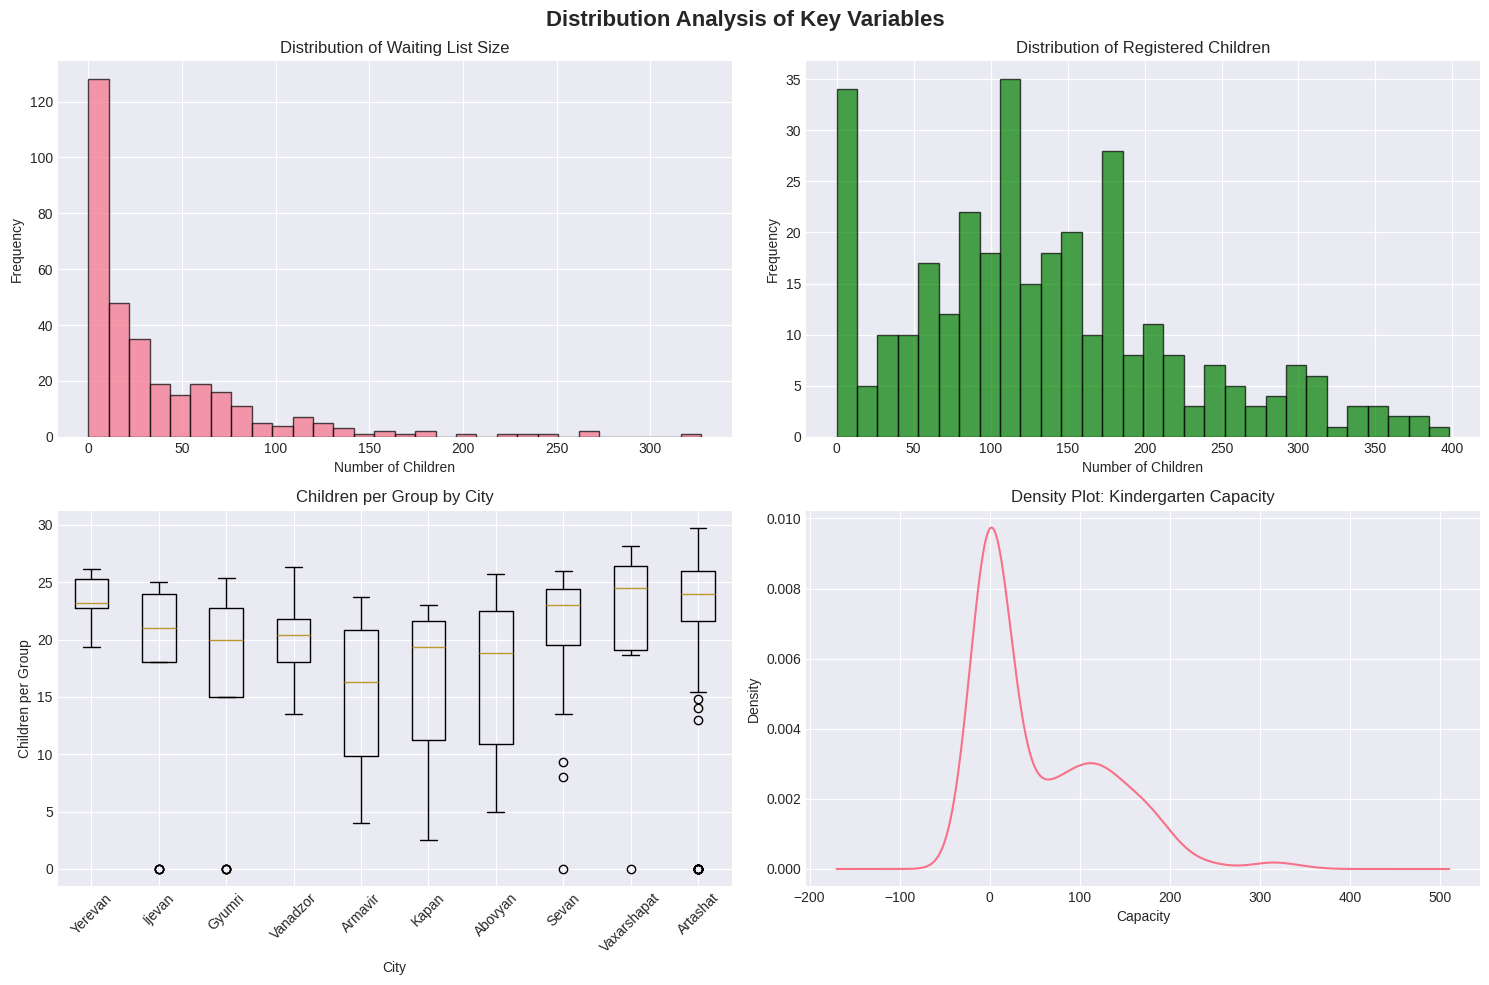

In [ ]:
# Set up visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create figure directory
import os
os.makedirs('figures', exist_ok=True)

# 5.1 DISTRIBUTION VISUALIZATIONS
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution Analysis of Key Variables', fontsize=16, fontweight='bold')

# Histogram: Waiting List
axes[0, 0].hist(df_preprocessed['order_count'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Waiting List Size')
axes[0, 0].set_xlabel('Number of Children')
axes[0, 0].set_ylabel('Frequency')

# Histogram: Registered Children
axes[0, 1].hist(df_preprocessed['registered_count'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('Distribution of Registered Children')
axes[0, 1].set_xlabel('Number of Children')
axes[0, 1].set_ylabel('Frequency')

# Box Plot: Children per Group
axes[1, 0].boxplot([group['children_per_group'].values for name, group in df_preprocessed.groupby('city')],
                    labels=df_preprocessed['city'].unique())
axes[1, 0].set_title('Children per Group by City')
axes[1, 0].set_xlabel('City')
axes[1, 0].set_ylabel('Children per Group')
axes[1, 0].tick_params(axis='x', rotation=45)

# Density Plot: Capacity
df_preprocessed['capacity'].plot(kind='density', ax=axes[1, 1])
axes[1, 1].set_title('Density Plot: Kindergarten Capacity')
axes[1, 1].set_xlabel('Capacity')

#Saving to Google Drive
plt.tight_layout()
plt.savefig(f'{drive_folder}/01_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### 5.2 Correlation Heatmap


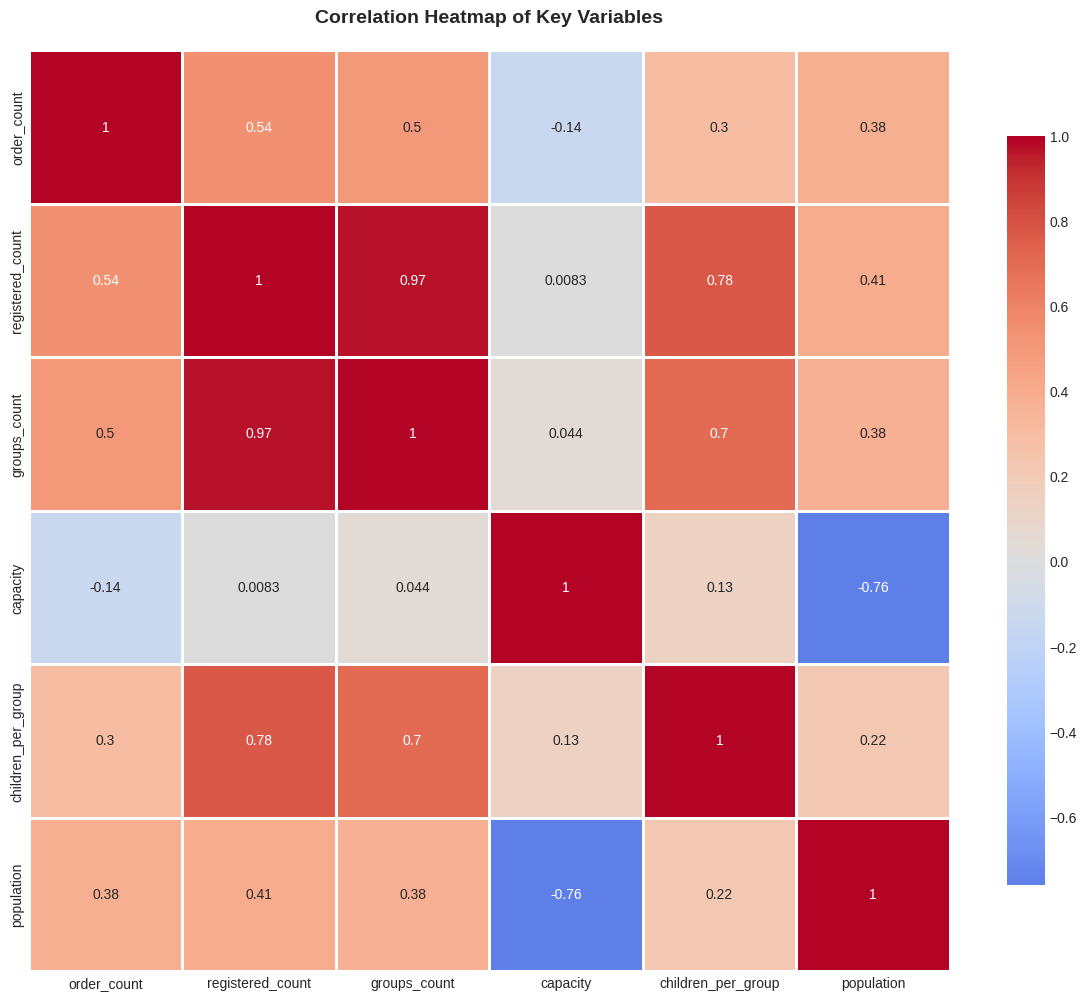

In [ ]:
# 5.2 CORRELATION HEATMAP

plt.figure(figsize=(12, 10))
correlation_matrix_viz = df_preprocessed[correlation_vars].corr()
sns.heatmap(correlation_matrix_viz, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Key Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(f'{drive_folder}/02_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### 5.3 Scatter Plots

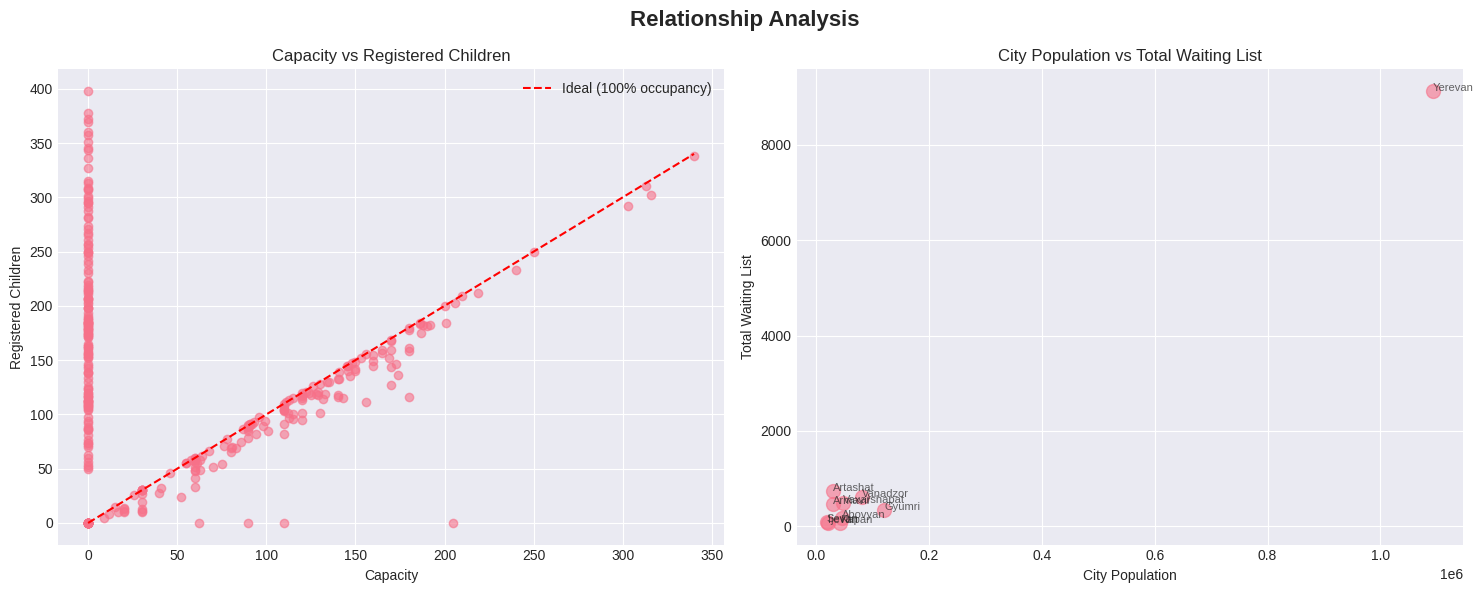

In [ ]:
# 5.3 SCATTER PLOTS
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Relationship Analysis', fontsize=16, fontweight='bold')

# Scatter: Capacity vs Registered
axes[0].scatter(df_preprocessed['capacity'], df_preprocessed['registered_count'], alpha=0.6)
axes[0].set_xlabel('Capacity')
axes[0].set_ylabel('Registered Children')
axes[0].set_title('Capacity vs Registered Children')
axes[0].plot([0, df_preprocessed['capacity'].max()], [0, df_preprocessed['capacity'].max()],
             'r--', label='Ideal (100% occupancy)')
axes[0].legend()

# Scatter: Population vs Waiting List
city_aggregated = df_preprocessed.groupby('city').agg({
    'population': 'first',
    'order_count': 'sum'
}).reset_index()

axes[1].scatter(city_aggregated['population'], city_aggregated['order_count'], alpha=0.6, s=100)
for idx, row in city_aggregated.iterrows():
    axes[1].annotate(row['city'], (row['population'], row['order_count']),
                    fontsize=8, alpha=0.7)
axes[1].set_xlabel('City Population')
axes[1].set_ylabel('Total Waiting List')
axes[1].set_title('City Population vs Total Waiting List')

plt.tight_layout()
plt.savefig(f'{drive_folder}/03_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### 5.4 Bar Plots

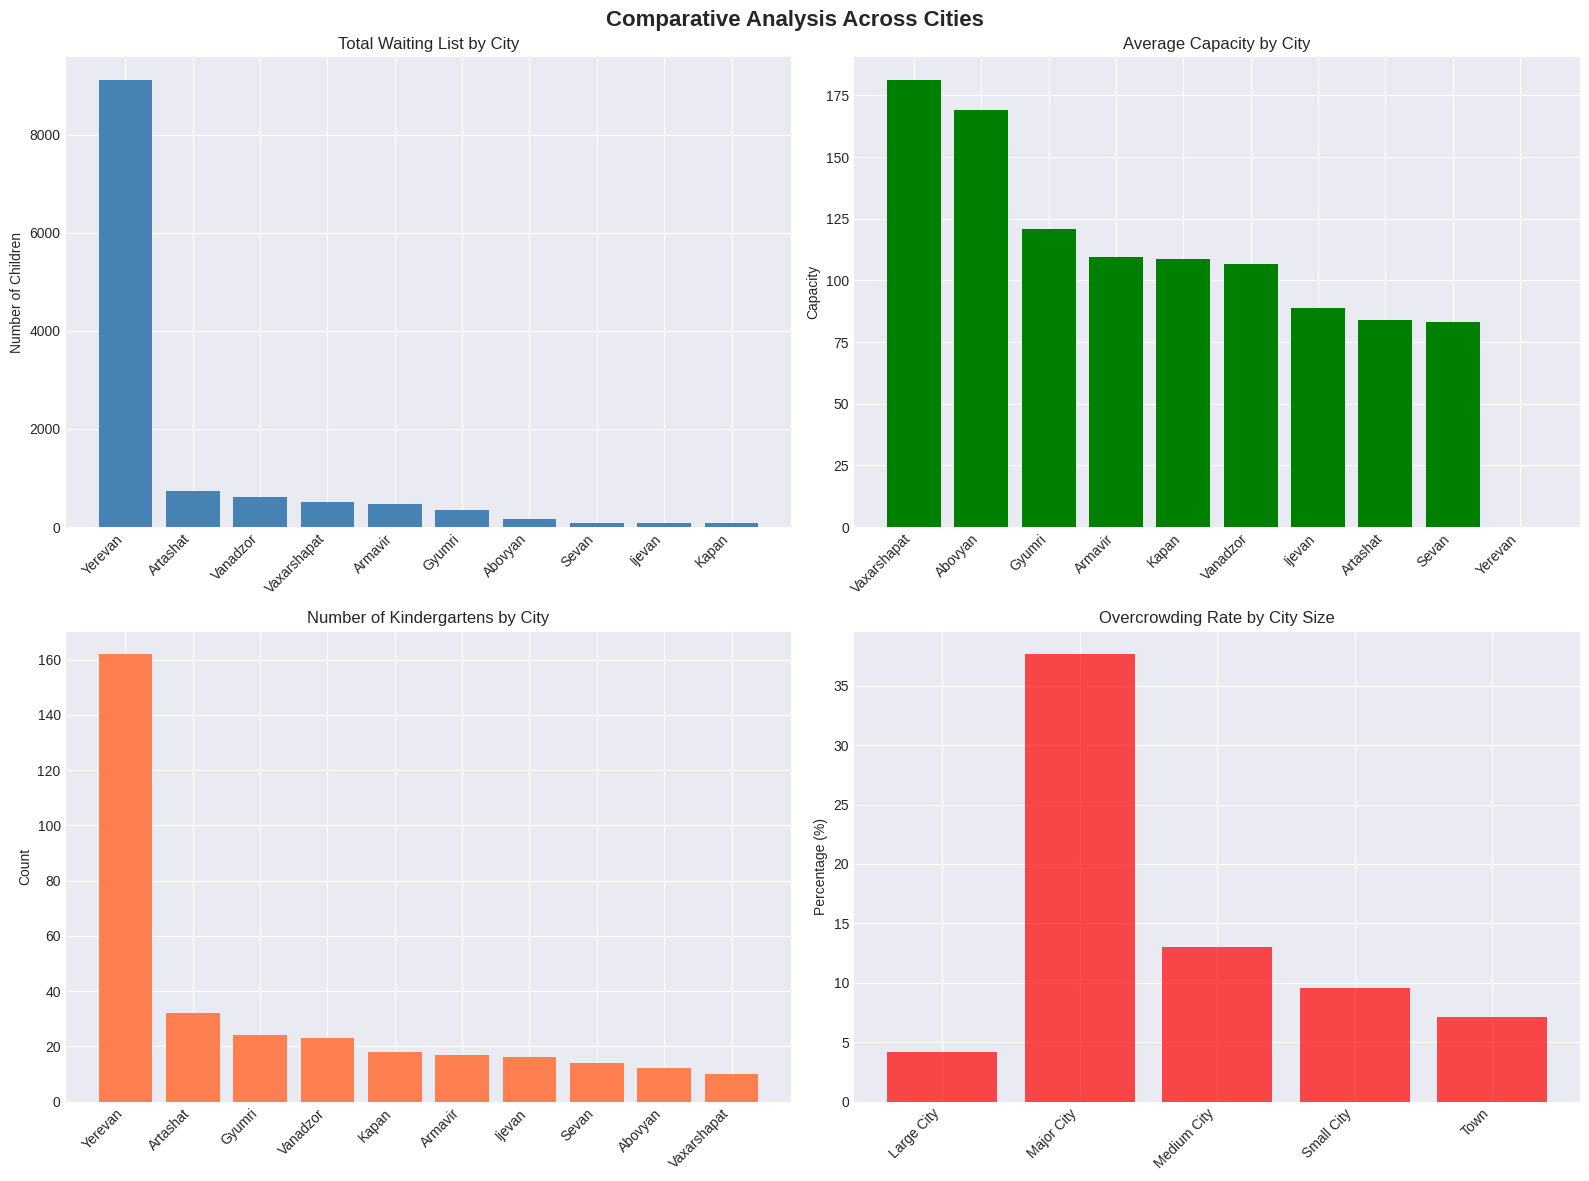

In [ ]:
# 5.4 BAR PLOTS
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparative Analysis Across Cities', fontsize=16, fontweight='bold')

# Bar: Total waiting list by city
city_waiting = df_preprocessed.groupby('city')['order_count'].sum().sort_values(ascending=False)
axes[0, 0].bar(range(len(city_waiting)), city_waiting.values, color='steelblue')
axes[0, 0].set_xticks(range(len(city_waiting)))
axes[0, 0].set_xticklabels(city_waiting.index, rotation=45, ha='right')
axes[0, 0].set_title('Total Waiting List by City')
axes[0, 0].set_ylabel('Number of Children')

# Bar: Average capacity by city
city_capacity = df_preprocessed.groupby('city')['capacity'].mean().sort_values(ascending=False)
axes[0, 1].bar(range(len(city_capacity)), city_capacity.values, color='green')
axes[0, 1].set_xticks(range(len(city_capacity)))
axes[0, 1].set_xticklabels(city_capacity.index, rotation=45, ha='right')
axes[0, 1].set_title('Average Capacity by City')
axes[0, 1].set_ylabel('Capacity')

# Bar: Number of kindergartens by city
kg_count = df_preprocessed['city'].value_counts()
axes[1, 0].bar(range(len(kg_count)), kg_count.values, color='coral')
axes[1, 0].set_xticks(range(len(kg_count)))
axes[1, 0].set_xticklabels(kg_count.index, rotation=45, ha='right')
axes[1, 0].set_title('Number of Kindergartens by City')
axes[1, 0].set_ylabel('Count')

# Bar: Overcrowding by city size
overcrowd_by_size = df_preprocessed.groupby('city_size')['is_overcrowded'].mean() * 100
axes[1, 1].bar(range(len(overcrowd_by_size)), overcrowd_by_size.values, color='red', alpha=0.7)
axes[1, 1].set_xticks(range(len(overcrowd_by_size)))
axes[1, 1].set_xticklabels(overcrowd_by_size.index, rotation=45, ha='right')
axes[1, 1].set_title('Overcrowding Rate by City Size')
axes[1, 1].set_ylabel('Percentage (%)')

plt.tight_layout()
plt.savefig(f'{drive_folder}/04_bar_plots.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### 5.5 Box Plots

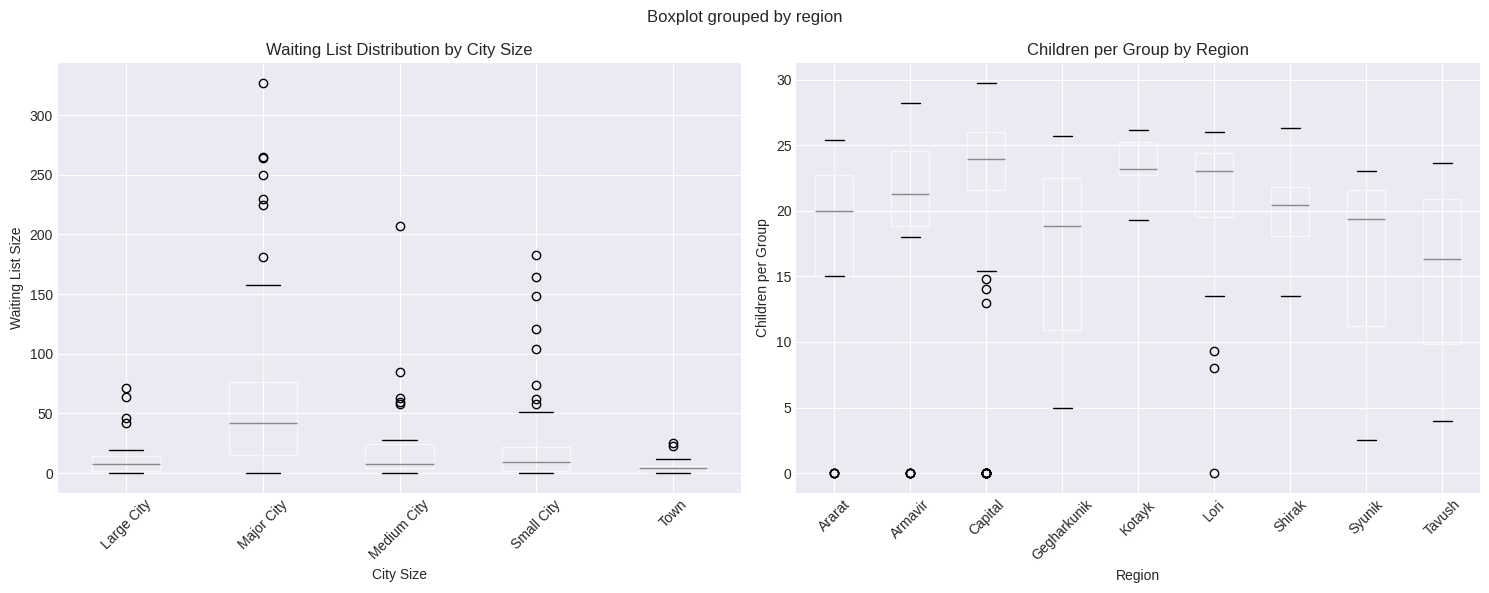

In [ ]:

# 5.5 BOX PLOTS
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Distribution Comparison Across Groups', fontsize=16, fontweight='bold')

# Box plot: Waiting list by city size
df_preprocessed.boxplot(column='order_count', by='city_size', ax=axes[0])
axes[0].set_title('Waiting List Distribution by City Size')
axes[0].set_xlabel('City Size')
axes[0].set_ylabel('Waiting List Size')
plt.sca(axes[0])
plt.xticks(rotation=45)

# Box plot: Children per group by region
df_preprocessed.boxplot(column='children_per_group', by='region', ax=axes[1])
axes[1].set_title('Children per Group by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Children per Group')
plt.sca(axes[1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(f'{drive_folder}/05_box_plots.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


### 5.6 More Visualizations

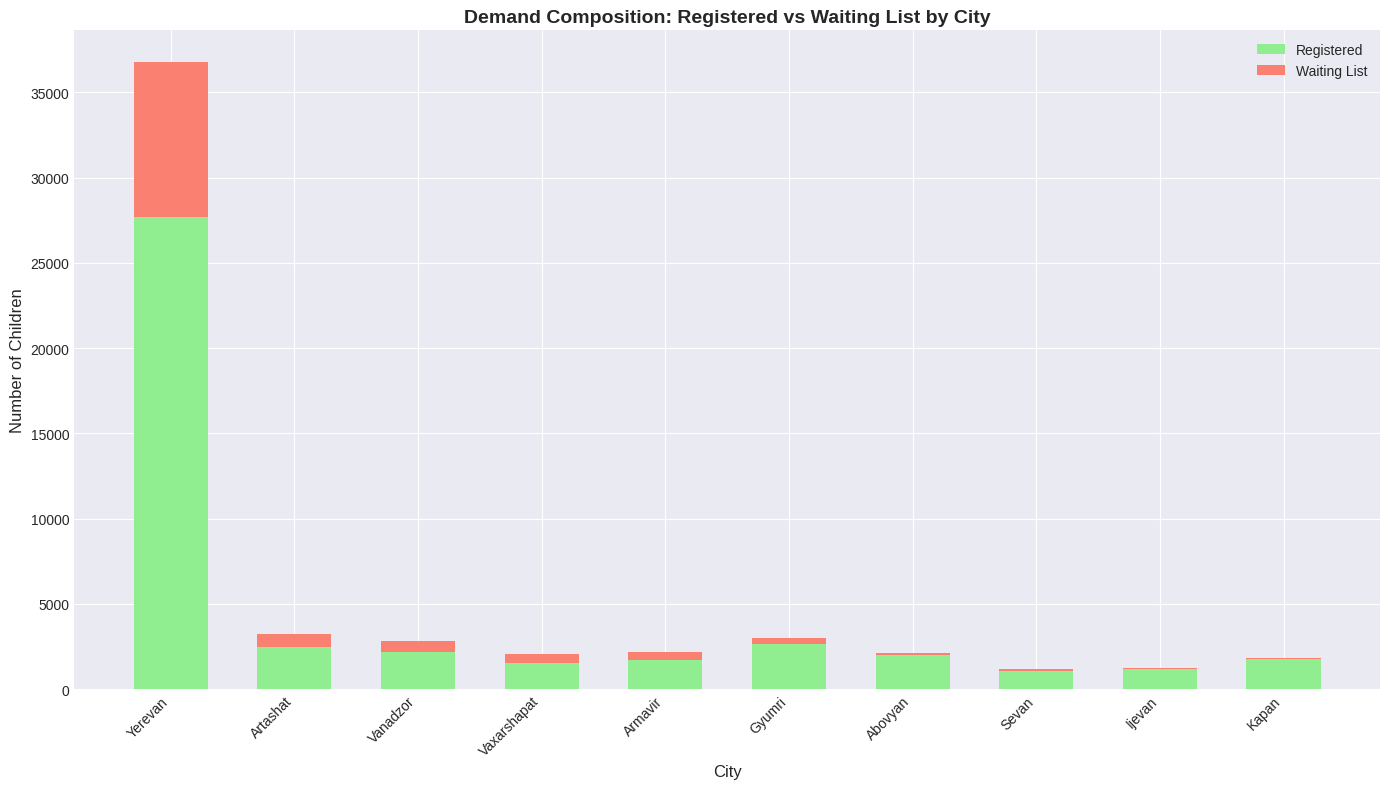


✓ All visualizations completed and saved in Google Drive


In [ ]:
# 5.6 More VISUALIZATIONS

# Stacked bar chart: Demand composition by city
fig, ax = plt.subplots(figsize=(14, 8))
city_demand = df_preprocessed.groupby('city').agg({
    'order_count': 'sum',
    'registered_count': 'sum'
}).sort_values('order_count', ascending=False)

x = np.arange(len(city_demand))
width = 0.6

ax.bar(x, city_demand['registered_count'], width, label='Registered', color='lightgreen')
ax.bar(x, city_demand['order_count'], width, bottom=city_demand['registered_count'],
       label='Waiting List', color='salmon')

ax.set_xlabel('City', fontsize=12)
ax.set_ylabel('Number of Children', fontsize=12)
ax.set_title('Demand Composition: Registered vs Waiting List by City', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(city_demand.index, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.savefig(f'{drive_folder}/06_demand_composition.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

print(f'\n✓ All visualizations completed and saved in Google Drive')

# Stage 6: Results Explanation:


In [ ]:
print("""
KEY FINDINGS:

1. DEMAND PATTERNS:
   • Yerevan dominates with 162 kindergartens (49% of dataset)
   • Total waiting list across all cities: {} children
   • Average waiting list per kindergarten: {:.1f} children
   • {}% of kindergartens have active waiting lists

2. CAPACITY ANALYSIS:
   • Average capacity per kindergarten: {:.1f} children
   • Average registered children: {:.1f}
   • Average occupancy rate: {:.1%}
   • {}% of kindergartens are overcrowded (>25 children/group)

3. REGIONAL VARIATIONS:
   • Capital city (Yerevan) shows highest demand pressure
   • Large cities (Gyumri, Vanadzor) have moderate demand
   • Smaller cities show variable patterns

4. STATISTICAL SIGNIFICANCE:
   • Significant differences exist in demand across city sizes (p<0.05)
   • Strong correlation between capacity and registered children (r={:.2f})
   • Overcrowding is significantly associated with city size

5. IMPLICATIONS:
   • Immediate need for capacity expansion in high-demand areas
   • Regional disparities require targeted policy interventions
   • Urban kindergartens face greater pressure than rural ones
""".format(
    df_preprocessed['order_count'].sum(),
    df_preprocessed['order_count'].mean(),
    (df_preprocessed['has_waiting_list'].sum() / len(df_preprocessed) * 100),
    df_preprocessed['capacity'].mean(),
    df_preprocessed['registered_count'].mean(),
    (df_preprocessed['registered_count'].sum() / df_preprocessed['capacity'].sum()),
    (df_preprocessed['is_overcrowded'].sum() / len(df_preprocessed) * 100),
    correlation_matrix.loc['capacity', 'registered_count']
))


KEY FINDINGS:

1. DEMAND PATTERNS:
   • Yerevan dominates with 162 kindergartens (49% of dataset)
   • Total waiting list across all cities: 12206 children
   • Average waiting list per kindergarten: 37.2 children
   • 90.2439024390244% of kindergartens have active waiting lists

2. CAPACITY ANALYSIS:
   • Average capacity per kindergarten: 55.7 children
   • Average registered children: 134.5
   • Average occupancy rate: 241.4%
   • 23.170731707317074% of kindergartens are overcrowded (>25 children/group)

3. REGIONAL VARIATIONS:
   • Capital city (Yerevan) shows highest demand pressure
   • Large cities (Gyumri, Vanadzor) have moderate demand
   • Smaller cities show variable patterns

4. STATISTICAL SIGNIFICANCE:
   • Significant differences exist in demand across city sizes (p<0.05)
   • Strong correlation between capacity and registered children (r=0.01)
   • Overcrowding is significantly associated with city size

5. IMPLICATIONS:
   • Immediate need for capacity expansion in hi

# PROJECT COMPLETION SUMMARY


In [ ]:
summary_stats = {
    'Total Kindergartens Analyzed': len(df_preprocessed),
    'Cities Covered': df_preprocessed['city'].nunique(),
    'Total Features Created': len(df_preprocessed.columns),
    'Visualizations Generated': 6,
    'Statistical Tests Performed': 3
}

print("\nProject Statistics:")
for key, value in summary_stats.items():
    print(f"  • {key}: {value}")

print("\nOutput Files Generated:")
print("  • multi_city_kindergartens_cleaned.csv")
print("  • kindergartens_preprocessed.csv")
print("  • 01_distributions.png")
print("  • 02_correlation_heatmap.png")
print("  • 03_scatter_plots.png")
print("  • 04_bar_plots.png")
print("  • 05_box_plots.png")
print("  • 06_demand_composition.png")
print("\nFind them in Google Drive")


Project Statistics:
  • Total Kindergartens Analyzed: 328
  • Cities Covered: 10
  • Total Features Created: 64
  • Visualizations Generated: 6
  • Statistical Tests Performed: 3

Output Files Generated:
  • multi_city_kindergartens_cleaned.csv
  • kindergartens_preprocessed.csv
  • 01_distributions.png
  • 02_correlation_heatmap.png
  • 03_scatter_plots.png
  • 04_bar_plots.png
  • 05_box_plots.png
  • 06_demand_composition.png

Find them in Google Drive
